<a href="https://colab.research.google.com/github/mshilpaa/EVA4/blob/master/Session%2012/Assignment-B/yolo_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import json

with open('/content/gdrive/My Drive/eva/yoloData_coco.json') as f:
  data = json.load(f)

In [58]:
data.keys()

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])

In [6]:
data['info']

{'contributor': '',
 'date_created': 'Thu Apr 16 2020 21:36:45 GMT+0530 (India Standard Time)',
 'description': 'Exported using VGG Image Annotator (http://www.robots.ox.ac.uk/~vgg/software/via/)',
 'url': 'http://www.robots.ox.ac.uk/~vgg/software/via/',
 'version': '1',
 'year': 2020}

In [0]:
annotations = data['annotations']

In [10]:
annotations[0].keys()

dict_keys(['id', 'image_id', 'segmentation', 'area', 'bbox', 'iscrowd'])

id - It is the unique id for the annotations.

image_id - It corresponds to the imageid that we have in the image section.

segmentation - the x and y coordinates for the vertices of the polygon around every object instance for the segmentation masks.

area - area of the bounding box

bbox - the dimensions of the bounding box: *(x-top left, y-top left, width, height)*

iscrowd - If we have a single object segmentation then iscrowd is set to zero. For a collection of objects present in the image, we set iscrowd=1, in which case RLE is used.RLE is Run Length Encoding. When iscrowd=1, then we add attribute counts and size in the segmentation section.


In [57]:
annotations[0]

{'area': 22165,
 'bbox': [79, 32, 143, 155],
 'id': 0,
 'image_id': '0',
 'iscrowd': 0,
 'segmentation': [79, 32, 222, 32, 222, 187, 79, 187]}

In [9]:
len(annotations)

50

In [24]:
data['images'][0].keys()

dict_keys(['id', 'width', 'height', 'file_name', 'license', 'date_captured'])

id: It is the unique id of the image

height: height of image in pixels

width: width of the image in pixels

file_name: name of file

In [59]:
data['images'][0]

{'date_captured': '',
 'file_name': '1.jfif',
 'height': 187,
 'id': 0,
 'license': 1,
 'width': 269}

In [28]:
len(data['images'])

50

Normalizing the bounding boxes width and height to make the bounding boxes comparable

In [0]:
bbox = []
for i in range(len(annotations)):
  width = annotations[i]['bbox'][2]/data['images'][i]['width']
  height = annotations[i]['bbox'][3]/data['images'][i]['height']
  bbox.append([width,height])

In [31]:
bbox

[[0.5315985130111525, 0.8288770053475936],
 [0.39615384615384613, 0.9742268041237113],
 [0.3511705685618729, 0.6726190476190477],
 [0.7075812274368231, 0.9230769230769231],
 [0.5970695970695971, 0.7135135135135136],
 [0.3381818181818182, 0.5519125683060109],
 [0.47876447876447875, 0.8195876288659794],
 [0.49575070821529743, 0.958041958041958],
 [0.28363636363636363, 0.7868852459016393],
 [0.32061068702290074, 0.7447916666666666],
 [0.6640926640926641, 0.9484536082474226],
 [0.30666666666666664, 0.875],
 [0.7333333333333333, 0.6130952380952381],
 [0.3236363636363636, 0.6120218579234973],
 [0.33454545454545453, 0.6502732240437158],
 [0.4072727272727273, 0.6174863387978142],
 [0.3270440251572327, 0.8805031446540881],
 [0.5774647887323944, 0.5280898876404494],
 [0.6476868327402135, 0.6145251396648045],
 [0.4763636363636364, 0.5901639344262295],
 [0.4690909090909091, 0.5683060109289617],
 [0.8066666666666666, 0.6488095238095238],
 [0.8416988416988417, 0.520618556701031],
 [0.204225352112676

In [0]:
bbox = np.array(bbox)

In [0]:
from sklearn.cluster import KMeans

Text(0.5, 0, 'k')

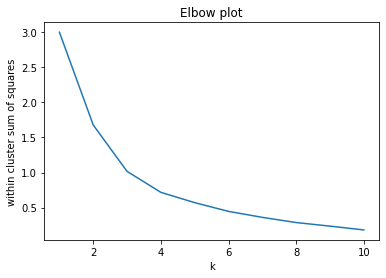

In [60]:
clusters = list(range(1,11))

inertias = []
for cluster in clusters:
    kmeans = KMeans(n_clusters=cluster).fit(bbox)
    inertias.append(kmeans.inertia_) # gives within-cluster sum-of-squares value

plt.plot(clusters,inertias)
plt.title('Elbow plot')
plt.ylabel('within cluster sum of squares')
plt.xlabel('k')

In [0]:
kmeans = KMeans( n_clusters=3)
pred = kmeans.fit_predict(bbox)


In [54]:
kmeans.cluster_centers_

array([[0.72872185, 0.63933482],
       [0.34137158, 0.68030691],
       [0.56004114, 0.92361942]])

In [55]:
kmeans.cluster_centers_[:, 1]

array([0.63933482, 0.68030691, 0.92361942])

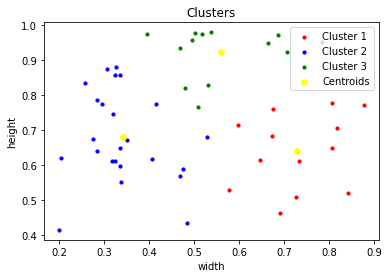

In [56]:
plt.scatter(bbox[pred == 0, 0], bbox[pred == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(bbox[pred == 1, 0], bbox[pred == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(bbox[pred == 2, 0], bbox[pred == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('width')
plt.ylabel('height')
plt.legend()
plt.show()